# 1 часть

For each year of birth YYYY after 1879, we created a comma-delimited file called
yobYYYY.txt. Each record in the individual annual files has the format "name,sex,number,"
where name is 2 to 15 characters, sex is M (male) or F (female) and "number" is the number of
occurrences of the name. Each file is sorted first on sex and then on number of occurrences in
descending order. When there is a tie on the number of occurrences, names are listed in alphabetical
order. This sorting makes it easy to determine a name's rank. The first record for each sex has
rank 1, the second record for each sex has rank 2, and so forth.
To safeguard privacy, we restrict our list of names to those with at least 5 occurrences.


Для каждого года рождения YYYY после 1879 года мы создавали файл с разделителями-запятыми под названием
yobYYYY.txt. Каждая запись в отдельных годовых файлах имеет формат «имя, пол, номер»
где имя от 2 до 15 символов, пол - это M (мужчина) или F (женщина), а «число» - это число
вхождения имени. Каждый файл сортируется сначала по полу, а затем по количеству вхождений в
в порядке убывания. Если количество совпадений совпадает, имена отображаются в алфавитном порядке.
Эта сортировка позволяет легко определить ранг имени. Первая запись для каждого пола имеет
ранг 1, вторая запись для каждого пола имеет ранг 2 и т. д.
Чтобы обеспечить конфиденциальность, мы ограничиваем наш список имен как минимум пятью случаями.


In [110]:
date_range = (1880, 2010) ## начало и конец файлов

In [111]:
import pandas as pd

In [115]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [116]:
import seaborn as sn

In [117]:
df = pd.read_csv('babynames/yob' + str(date_range[0]) + '.txt', sep=',', header = None)

Загружен 1 файл. Проанализируем его и отработаем приведение его в рабочее состояние. Для этого добавим название столбцов, добавим год, посчитаем нет ли пропущенных данных

In [118]:
df.shape

(2000, 3)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
0    2000 non-null object
1    2000 non-null object
2    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


Пропущенных данных нет, но для других файлов это лучше также проверить

In [120]:
df.head(2)

,0,1,2
0,Mary,F,7065
1,Anna,F,2604


В первой строке - имя, во второй - пол, в третий вхождение

In [121]:
columns_name = ['name', 'sex', 'count']

In [122]:
df.columns = columns_name

In [123]:
df['year'] = date_range[0]

In [124]:
df.head(2)

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880


Теперь повторим это для всех остальных и склеим в один массив

In [125]:
df_copy = df.copy()

In [126]:
for year in range(date_range[0]+1, date_range[1]+1):
    df_inner = pd.read_csv('babynames/yob' + str(year) + '.txt', sep=',', header = None)
    df_inner.columns = columns_name
    df_inner['year'] = year
    df=df.append(df_inner, ignore_index = True)

Проверим на null и посмотрим общее количество

In [127]:
df.shape

(1690784, 4)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name     1690784 non-null object
sex      1690784 non-null object
count    1690784 non-null int64
year     1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [129]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

Т.е. только 2 значения. Для удобства работы можно перевести в категориальные переменные

In [130]:
df['sex'] = df['sex'].astype('category')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name     1690784 non-null object
sex      1690784 non-null category
count    1690784 non-null int64
year     1690784 non-null int64
dtypes: category(1), int64(2), object(1)
memory usage: 40.3+ MB


### Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [132]:
df_sex_year = df[['sex', 'year', 'count']].groupby(by=['sex', 'year'])

In [138]:
for_plot1 = df_sex_year.sum()

In [139]:
for_plot1 = for_plot1.reset_index()

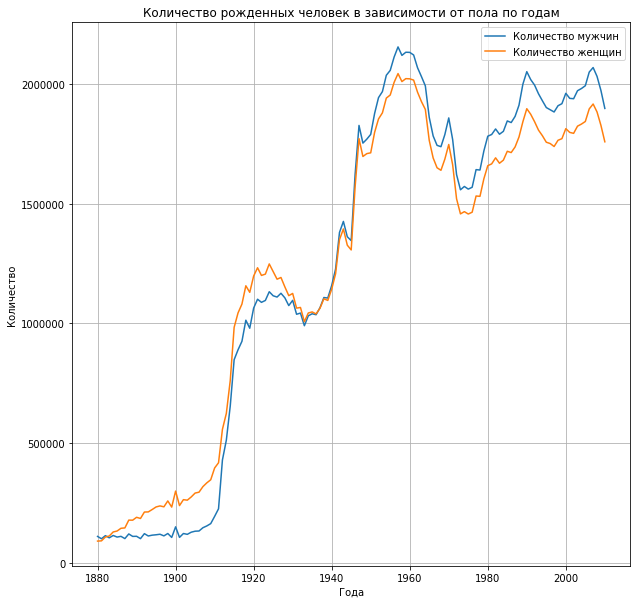

In [145]:
plt.figure(figsize=(10,10))
plt.plot(for_plot1.loc[for_plot1['sex']=='M', 'year'], for_plot1.loc[for_plot1['sex']=='M', 'count'], label='Количество мужчин')
plt.plot(for_plot1.loc[for_plot1['sex']=='F', 'year'], for_plot1.loc[for_plot1['sex']=='F', 'count'], label='Количество женщин')
plt.xlabel('Года')
plt.ylabel('Количество')
plt.title('Количество рожденных человек в зависимости от пола по годам')
plt.grid()
plt.legend()

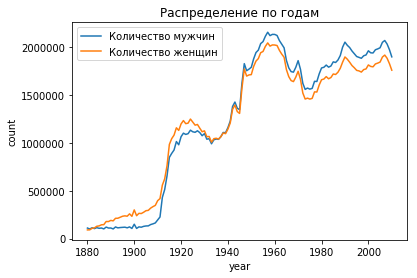

In [150]:
sn.lineplot(for_plot1.loc[for_plot1['sex']=='M', 'year'], for_plot1.loc[for_plot1['sex']=='M', 'count'], label='Количество мужчин').set_title('Распределение по годам')
sn.lineplot(for_plot1.loc[for_plot1['sex']=='F', 'year'], for_plot1.loc[for_plot1['sex']=='F', 'count'], label='Количество женщин')

### Найдите самые популярные имена за всю историю

Для этого самое простое - сгруппировать по именам и посчитать для каждого имени сумму count. После этого отсортировать в порядке убывания. Так как в задании ничего не сказано про пол - делаю. без учета него

In [151]:
name_by_count =  df[['name', 'count']].groupby(by = 'name').sum()

In [152]:
most_popular_names =  name_by_count.sort_values(by = 'count', ascending=False).head(20)

ради интереса построим столбчатую диаграмму по именам

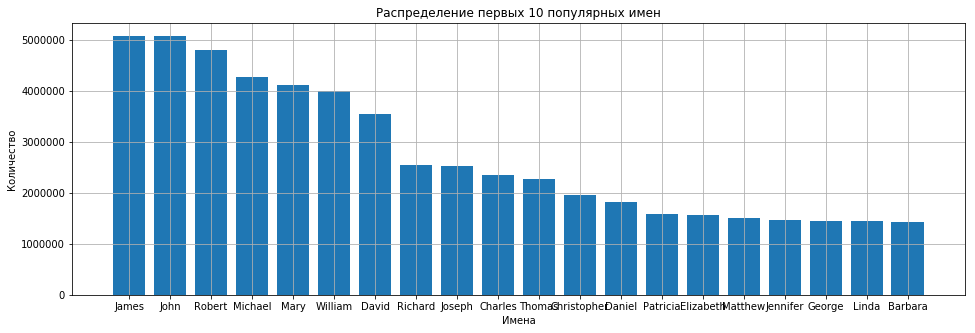

In [153]:
plt.figure(figsize=(16,5))
plt.bar(most_popular_names.index, most_popular_names['count'])
plt.xlabel('Имена')
plt.ylabel('Количество')
plt.title('Распределение первых 10 популярных имен')
plt.grid()


Text(0.5, 1.0, 'Распределение первых 10 популярных имен')

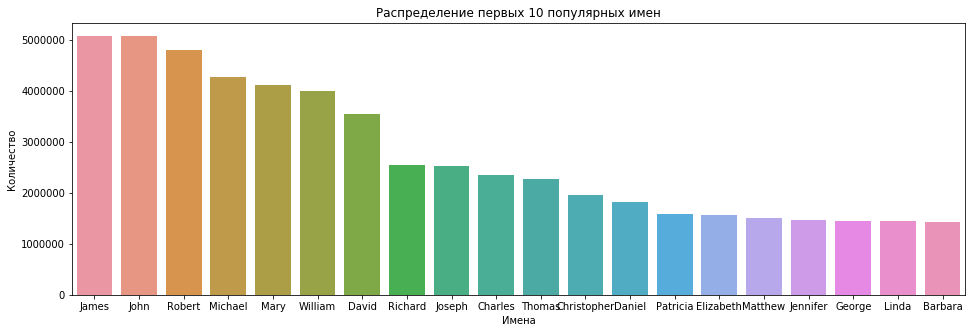

In [155]:
plt.figure(figsize=(16,5))
sn.barplot(most_popular_names.index, most_popular_names['count'])
plt.xlabel('Имена')
plt.ylabel('Количество')
plt.title('Распределение первых 10 популярных имен')

### Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени  визуализируйте его динамику за все время

У нас данные за 131 лет. Разобьем так чтобы в каждый промежуток попадало 13 лет. В последний период добавим последний год (будет 14)

In [156]:
male_names = []
female_names = []

In [157]:
min_year = df['year'].min()
max_year = df['year'].max()

In [158]:
step = int((max_year - min_year+1) / 10)

In [159]:
step

13

In [160]:
df_by_count_year = df.copy()

In [161]:
df_by_count_year['year_count'] = df_by_count_year.apply(lambda x: int((x['year']-min_year)/step), axis=1)

In [162]:
df_by_count_year.loc[df_by_count_year['year']==2010, 'year_count']=9

In [163]:
df_by_count_year_gb = df_by_count_year[['year', 'year_count']].groupby(by=['year_count'])

In [164]:
for year_count in range(10):
    male_name =  df_by_count_year.loc[(df_by_count_year['year_count']==year_count) & (df_by_count_year['sex'] == 'M') , ['name', 'count']].groupby(by = 'name').sum().sort_values(by = 'count', ascending=False).iloc[0].name
    female_name =  df_by_count_year.loc[(df_by_count_year['year_count']==year_count) & (df_by_count_year['sex'] == 'F') , ['name', 'count']].groupby(by = 'name').sum().sort_values(by = 'count', ascending=False).iloc[0].name
    male_names.append(male_name)
    female_names.append(female_name)

In [165]:
male_names, female_names

(['John',
  'John',
  'John',
  'Robert',
  'Robert',
  'James',
  'Michael',
  'Michael',
  'Michael',
  'Jacob'],
 ['Mary',
  'Mary',
  'Mary',
  'Mary',
  'Mary',
  'Linda',
  'Lisa',
  'Jennifer',
  'Jessica',
  'Emily'])

Так как у нас есть повторяющиеся имена - схлопнем их 

In [166]:
set_male_names = set(male_names)
set_female_names = set(female_names)

Теперь для всех имен распечатаем их изменения во времени. Делать будем это на одном графике, так интересней

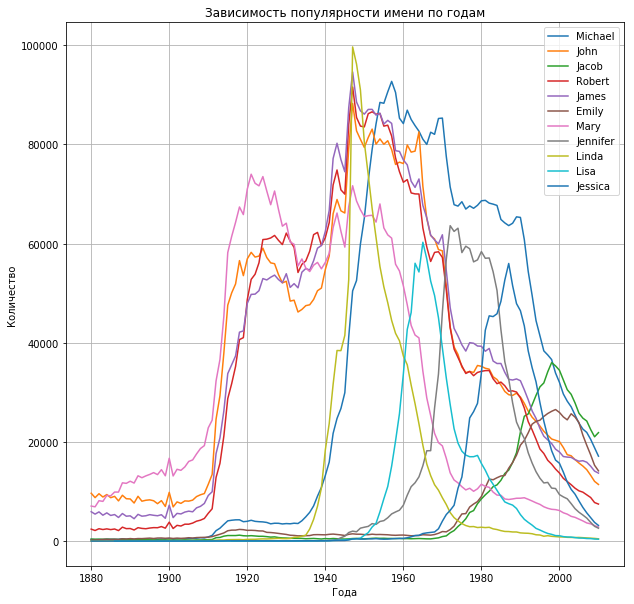

In [168]:
plt.figure(figsize=(10,10))
for name in  set_male_names:
    plt.plot(df_by_count_year.loc[(df_by_count_year['sex']=='M') & (df_by_count_year['name']==name), 'year'], 
             df_by_count_year.loc[(df_by_count_year['sex']=='M') & (df_by_count_year['name']==name), 'count'], label=name)
for name in  set_female_names:
    plt.plot(df_by_count_year.loc[(df_by_count_year['sex']=='F') & (df_by_count_year['name']==name), 'year'], 
             df_by_count_year.loc[(df_by_count_year['sex']=='F') & (df_by_count_year['name']==name), 'count'], label=name)
plt.xlabel('Года')
plt.ylabel('Количество')
plt.title('Зависимость популярности имени по годам')
plt.grid()
plt.legend()

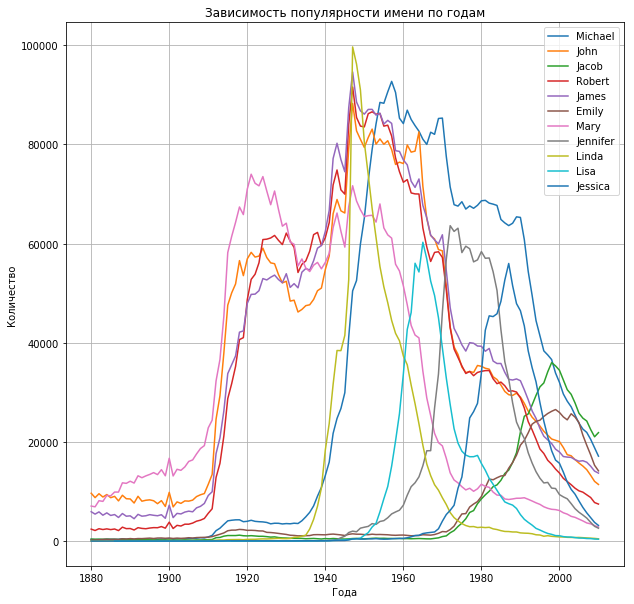

In [169]:
plt.figure(figsize=(10,10))
for name in  set_male_names:
    sn.lineplot(df_by_count_year.loc[(df_by_count_year['sex']=='M') & (df_by_count_year['name']==name), 'year'], 
             df_by_count_year.loc[(df_by_count_year['sex']=='M') & (df_by_count_year['name']==name), 'count'], label=name)
for name in  set_female_names:
    sn.lineplot(df_by_count_year.loc[(df_by_count_year['sex']=='F') & (df_by_count_year['name']==name), 'year'], 
             df_by_count_year.loc[(df_by_count_year['sex']=='F') & (df_by_count_year['name']==name), 'count'], label=name)
plt.xlabel('Года')
plt.ylabel('Количество')
plt.title('Зависимость популярности имени по годам')
plt.grid()
plt.legend()

### Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

немного поизвращаемся с оконными функциями. Для начала рассчитываем сколько всего родилось по годам. потом половину этого значения добавим в df, сделаем куммулятивную сумму по годам. сравним ее с половиной. дальшей посчитаем количество, что меньше. добавим 1 и по идее это будет ответ. только перед этим отсортировать значения внутри годов

In [170]:
df_50 = df.copy()

In [171]:
df_50.sort_values(by = ['year', 'count'], ascending=False, inplace=True)

In [172]:
df_50.head(2)

,name,sex,count,year
1656946,Isabella,F,22731,2010
1676644,Jacob,M,21875,2010


In [173]:
df_50_year_count = df_50[['year', 'count']].groupby(by='year').sum()

In [174]:
df_50_year_count['half']=df_50_year_count['count']/2

In [175]:
df_50_year_count.reset_index(inplace=True)

In [176]:
df_50['cumsum'] = df_50.groupby('year')['count'].transform(pd.Series.cumsum)


In [177]:
df_50.head(2)

,name,sex,count,year,cumsum
1656946,Isabella,F,22731,2010,22731
1676644,Jacob,M,21875,2010,44606


In [178]:
df_50_with_half = pd.merge(df_50, df_50_year_count[['year', 'half']], on='year')

In [179]:
df_50_count = df_50_with_half[df_50_with_half['cumsum']<df_50_with_half['half']]

In [180]:
for_plot = df_50_count.groupby('year').count()['name']

In [181]:
for_plot.head(5)

year
1880    45
1881    47
1882    49
1883    50
1884    53
Name: name, dtype: int64

In [182]:
for_plot = for_plot+1 

ради интереса построим график с заливкой

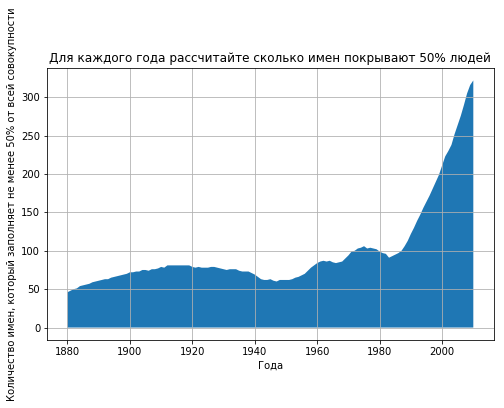

In [183]:
plt.figure(figsize=(8,5))
plt.stackplot(for_plot.index, for_plot)
plt.xlabel('Года')
plt.ylabel('Количество имен, который заполняет не менее 50% от всей совокупности')
plt.title('Для каждого года рассчитайте сколько имен покрывают 50% людей')
plt.grid()


### Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени

Честно, не очень понял задачу. Сделал следующее: взял наугад 4 года и отобразил для каждой буквы количество людей, у которых имя начинается с этой буквыm

In [184]:
years = [2000, 1990, 1980, 1970]

In [185]:
df_letters = df[df['year'].isin(years)].copy()

In [186]:
df_letters['year'].unique()

array([1970, 1980, 1990, 2000], dtype=int64)

добавим колонки с первой и последней буквой

In [187]:
names = df_letters['name']

In [188]:
df_letters['start_letter'] =  names.str.get(0).str.upper()

In [189]:
df_letters['end_letter'] =  names.str.get(-1).str.upper()

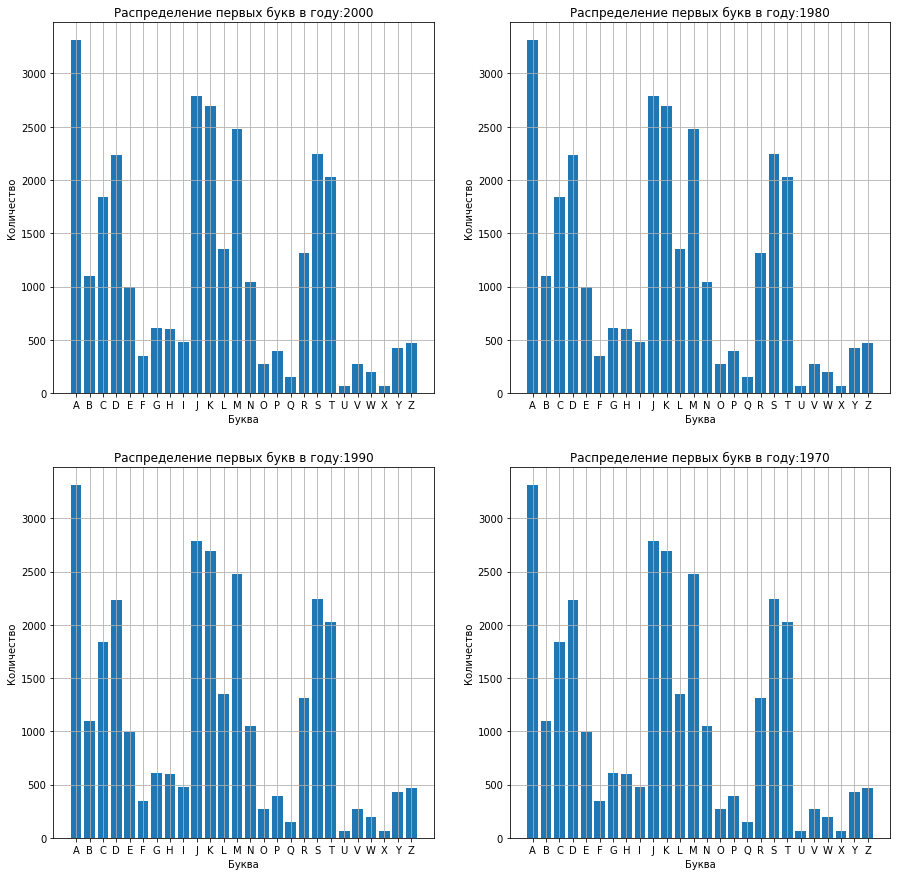

In [191]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
for i, year in enumerate(years):
    inner = df_letters[df_letters['year']==2000].groupby(by = 'start_letter').count()
    axs[i%2, int(i/2)].bar(inner.index, inner.name)
    axs[i%2, int(i/2)].set_xlabel('Буква')
    axs[i%2, int(i/2)].set_ylabel('Количество')
    axs[i%2, int(i/2)].set_title('Распределение первых букв в году:' + str(year))
    axs[i%2, int(i/2)].grid()


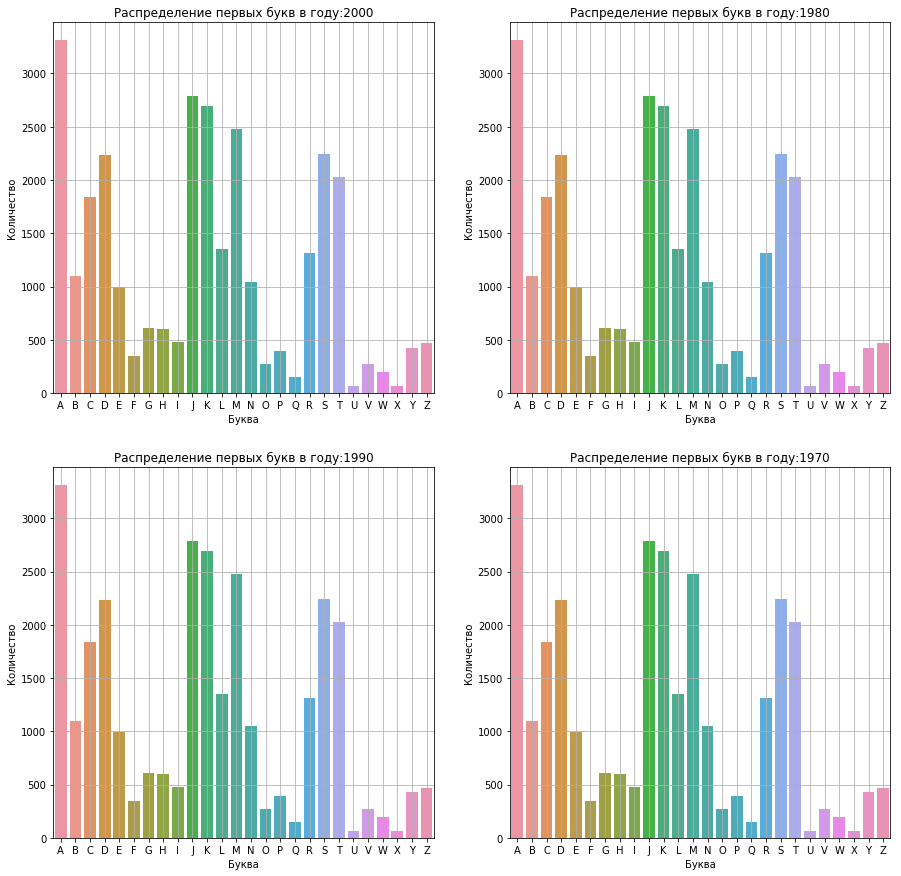

In [193]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
for i, year in enumerate(years):
    inner = df_letters[df_letters['year']==2000].groupby(by = 'start_letter').count()
    sn.barplot(inner.index, inner.name, ax = axs[i%2, int(i/2)])
    axs[i%2, int(i/2)].set_xlabel('Буква')
    axs[i%2, int(i/2)].set_ylabel('Количество')
    axs[i%2, int(i/2)].set_title('Распределение первых букв в году:' + str(year))
    axs[i%2, int(i/2)].grid()


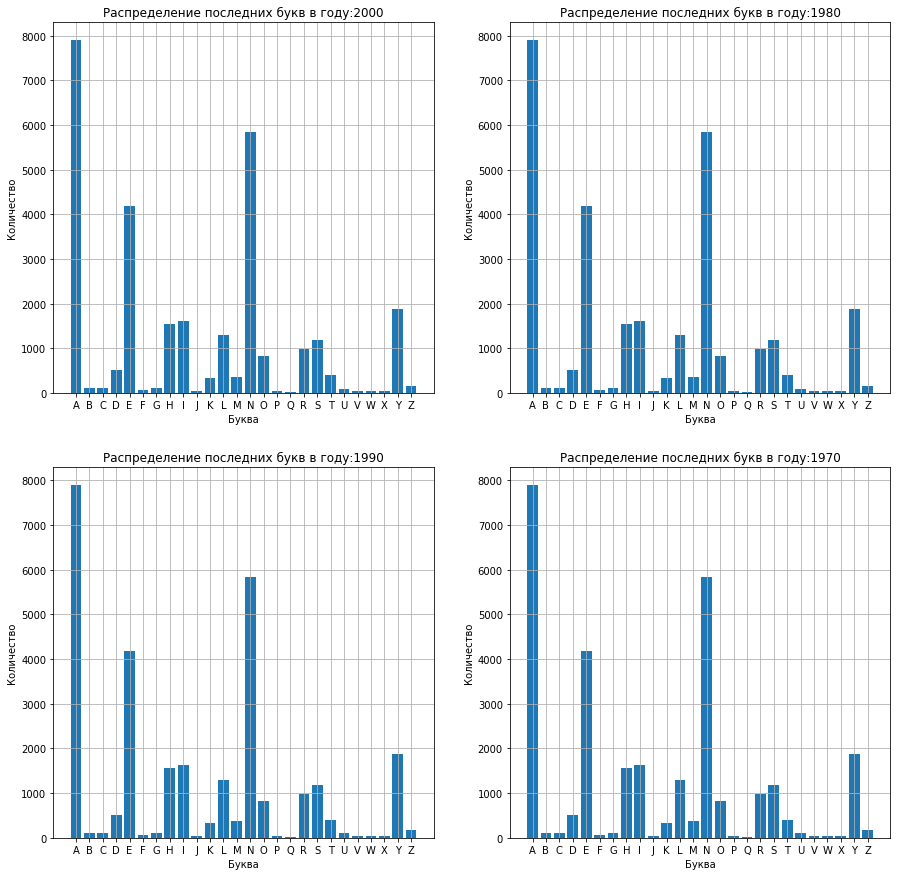

In [194]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
for i, year in enumerate(years):
    inner = df_letters[df_letters['year']==2000].groupby(by = 'end_letter').count()
    axs[i%2, int(i/2)].bar(inner.index, inner.name)
    axs[i%2, int(i/2)].set_xlabel('Буква')
    axs[i%2, int(i/2)].set_ylabel('Количество')
    axs[i%2, int(i/2)].set_title('Распределение последних букв в году:' + str(year))
    axs[i%2, int(i/2)].grid()


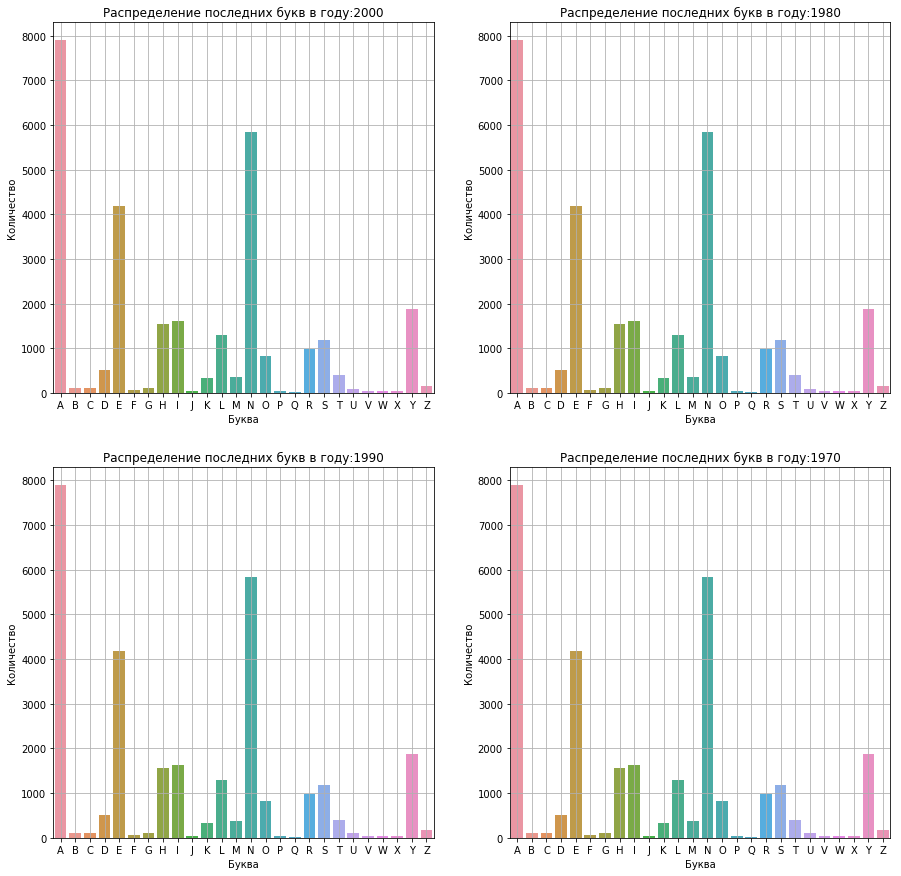

In [195]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))
for i, year in enumerate(years):
    inner = df_letters[df_letters['year']==2000].groupby(by = 'end_letter').count()
    sn.barplot(inner.index, inner.name, ax = axs[i%2, int(i/2)])
    axs[i%2, int(i/2)].set_xlabel('Буква')
    axs[i%2, int(i/2)].set_ylabel('Количество')
    axs[i%2, int(i/2)].set_title('Распределение последних букв в году:' + str(year))
    axs[i%2, int(i/2)].grid()

### Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию

Так как не указно сколько возьму трух человек - президент Франклин Рузвельт, актриса Мерлин Монро, киногерой Энакин Скайуокер

In [196]:
popular_names = ['Franklin', 'Marilyn', 'Anakin']

сначало проверим встречаются ли эти имена

In [197]:
df_names = df.copy()

In [198]:
df_names[df_names['name'].isin(popular_names)].groupby(by='name').count()

,sex,count,year
name,,,
Anakin,16,16,16
Franklin,206,206,206
Marilyn,173,173,173


Имена есть, графики строить можно, но лучше на разных 

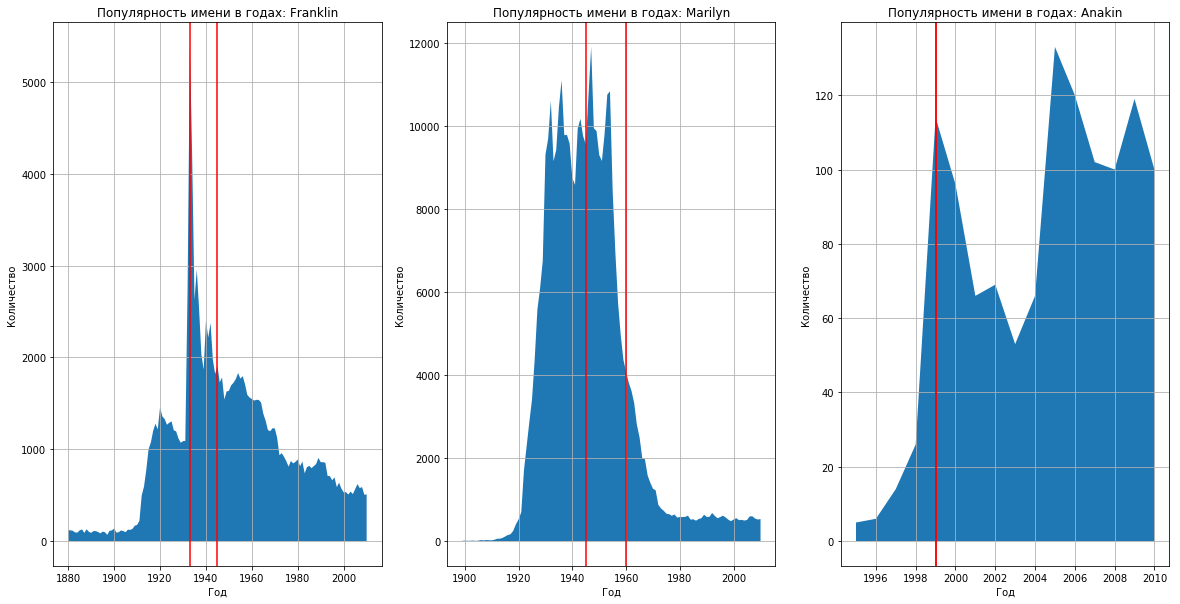

In [200]:
fig, axs = plt.subplots(1, 3,figsize=(20,10))
lines = [[1933, 1945], [1945,1960], [1999, 1999]]
for i, name in enumerate(popular_names):
    inner = df_names.loc[df_names['name']== name, ['year', 'count']].groupby(by = 'year').sum()
    axs[i].stackplot(inner.index, inner['count'])
    axs[i].axvline(x=lines[i][0], color = 'red')
    axs[i].axvline(x=lines[i][1], color = 'red')
    axs[i].set_xlabel('Год')
    axs[i].set_ylabel('Количество')
    axs[i].set_title('Популярность имени в годах: ' + str(name))
    axs[i].grid()


- Анакин (Звездные войны) - имя стало появляться с 1995 года. Персонаж придуман Джорджем Лукасом. По одной из версий, имя Энакин скопировано с фамилии друга Лукаса — режиссёра Кена Эннакина[3], однако сам Лукас это опроверг на следующий же день после смерти Кен (Wikipedia).  Фильмы с Анакином как главным действующим героем появились в 1999 (как раз виден всплеск)
- Мэрлин Монро - по данным wikipedia наибольшая популярность была в 1945-1960 годах, что  неплохо совпадает с пиками на графике
- Фра́нклин Делано́ Ру́звельт[8] (англ. Franklin Delano Roosevelt, МФА [ˈfræŋklɪn ˈdɛlənoʊ ˈroʊzəˌvɛlt]; в США также известен под инициалами — ФДР (англ. FDR); 30 января 1882, Хайд-Парк[en], штат Нью-Йорк — 12 апреля 1945, Уорм-Спрингс[en], Джорджия) — 32-й президент США, одна из центральных фигур мировых событий первой половины XX века, возглавлял США во время мирового экономического кризиса и Второй мировой войны. Президент с 1933-1945 года. - в принципе так же есть некоторый всплеск к этим годам.